# Predicting House Price:

The aim of this project is to predict sale prices of houses in Ames, Iowa using different aspects of residential homes. The data is collected from "https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data".

We start with importing some useful libraries like pandas, numpy and matplotlib, seaborn. For implementing Machine Learning models, I will use the scikit-learn library.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [8]:
all_data = pd.read_csv('../train.csv')
house_test = pd.read_csv('../test.csv')

In [6]:
all_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
house_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We can see the columns of the our datasets which are the features:

In [9]:
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#information about the saleprice of our data
all_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can visualize our data with respect to some features:

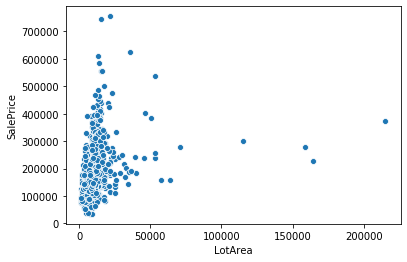

In [13]:
sns.scatterplot(x=all_data['LotArea'], y=all_data.SalePrice)

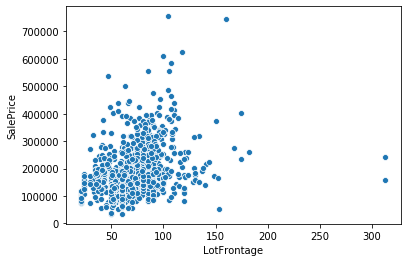

In [15]:
sns.scatterplot(x=all_data['LotFrontage'], y=all_data.SalePrice)

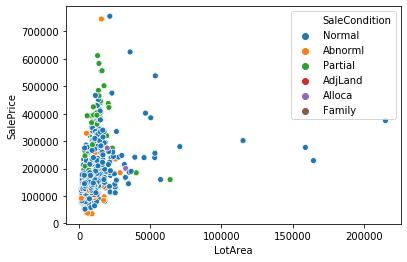

In [16]:
sns.scatterplot(x=all_data['LotArea'], y= all_data.SalePrice, hue=all_data['SaleCondition'] 
                ,data=all_data)

In [17]:
all_data['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

<Figure size 144x216 with 0 Axes>

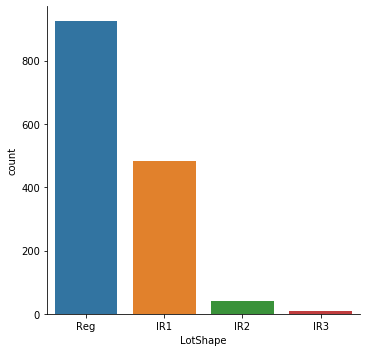

In [18]:
plt.figure(figsize=(2,3))
sns.catplot(x='LotShape', kind='count', data=all_data)

In [19]:
all_data['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

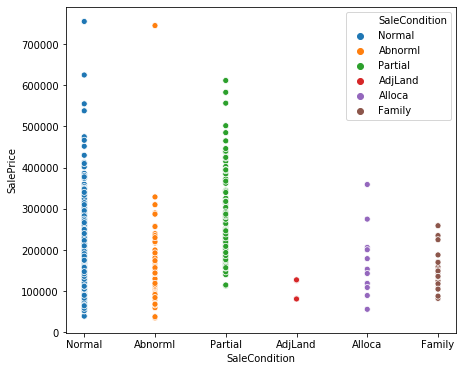

In [20]:
#salecondition with repect to price
plt.figure(figsize=(7,6))
sns.scatterplot(x=all_data['SaleCondition'], y=all_data.SalePrice, hue=all_data['SaleCondition'])

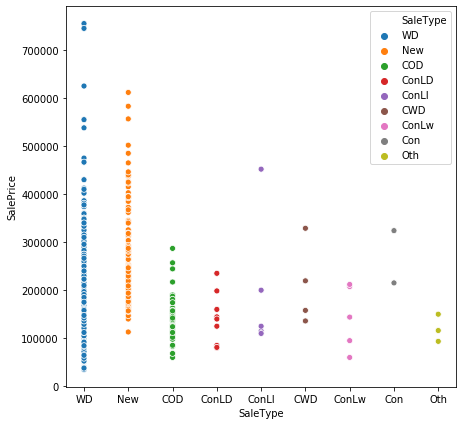

In [21]:
#salecondition with repect to price
plt.figure(figsize=(7,7))
sns.scatterplot(x=all_data['SaleType'], y=all_data.SalePrice, hue=all_data['SaleType'])

In [22]:
#MSSubClass: The building class
all_data['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40])

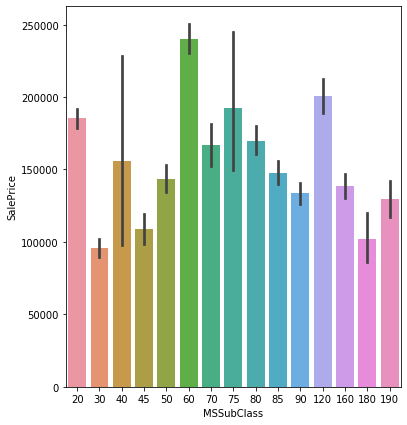

In [23]:
plt.figure(figsize=(6,7))
sns.barplot(x=all_data['MSSubClass'], y=all_data.SalePrice)

We can see that the building class "70" is more expensive than other classes.

In [25]:
all_data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

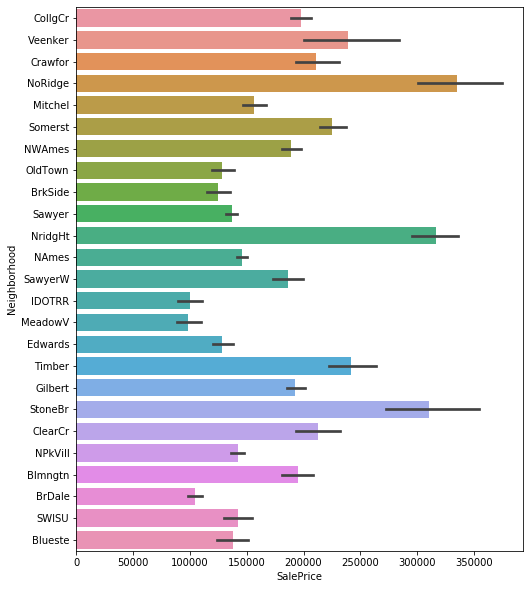

In [26]:
plt.figure(figsize=(8,10))
sns.barplot(y=all_data['Neighborhood'], x=all_data.SalePrice)

The house which are loacated in the neighborhood "NoRidge", "NridgHR" and "StoneBr" are more expensive.

In [28]:
#Condition1: Proximity to main road or railroad
all_data['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

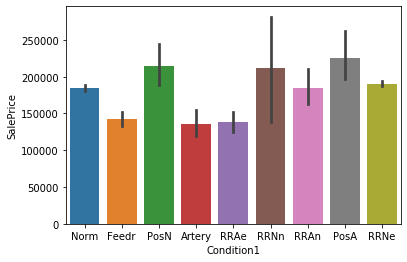

In [29]:
sns.barplot(x=all_data['Condition1'], y=all_data.SalePrice)

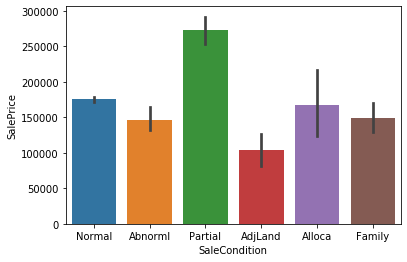

In [30]:
sns.barplot(x=all_data['SaleCondition'], y=all_data.SalePrice)

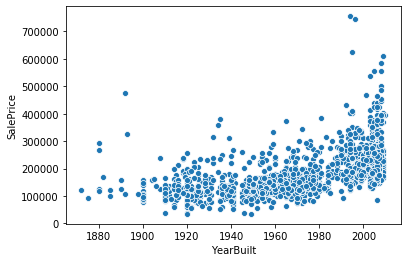

In [32]:
sns.scatterplot(x=all_data['YearBuilt'], y=all_data.SalePrice)

In [33]:
#Foundation: Type of foundation
all_data['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

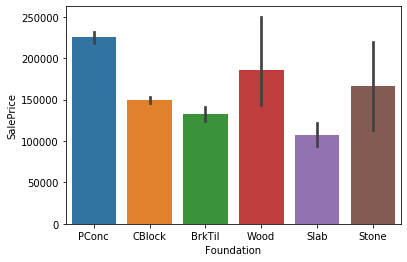

In [34]:
sns.barplot(x=all_data['Foundation'], y=all_data.SalePrice)

In [35]:
#Heating
all_data['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

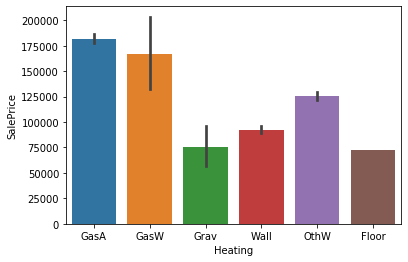

In [36]:
sns.barplot(x=all_data['Heating'], y=all_data.SalePrice)

It seems that the houses with "GasA" and "GasW" for heating method are more expensive.

In [38]:
#GarageType: Garage location
all_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

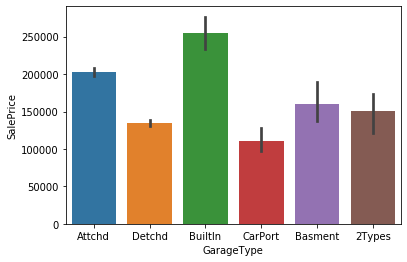

In [39]:
sns.barplot(x=all_data['GarageType'], y=all_data.SalePrice)

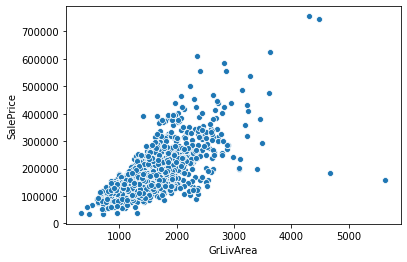

In [40]:
#GrLivArea: Above grade (ground) living area square feet
sns.scatterplot(x=all_data['GrLivArea'], y=all_data.SalePrice)

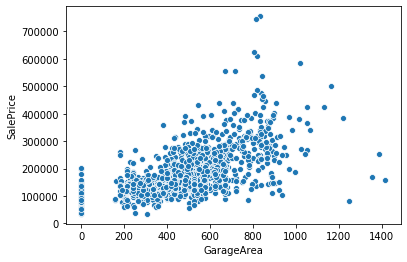

In [41]:
#GarageArea: Size of garage in square feet
sns.scatterplot(x=all_data['GarageArea'], y=all_data.SalePrice)

We can check the skewness of our target:

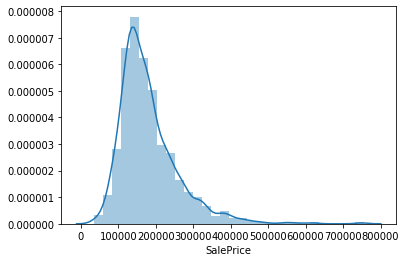

In [47]:
sns.distplot(target, hist=True, kde=True, bins=30)

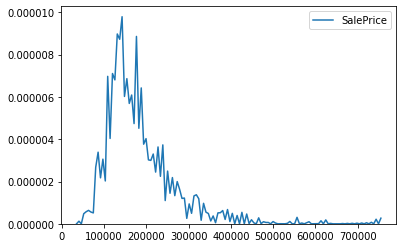

In [48]:

sns.kdeplot(target, bw=0.3)

In [49]:
print("skewness: ", target.skew())

skewness:  1.8828757597682129


The skewness is positive. We can make it normally distribued otherwise we have many ouliers in the right side of the our data.

In the regression problems sometimes it makes sense to use log-transform for the target variables when it is skewed. We should pay attentiion to convert the predictions to the original by taking np.exp() since the predictions generated by the final model will also be log-transformed.

In [50]:
output = np.log(target)

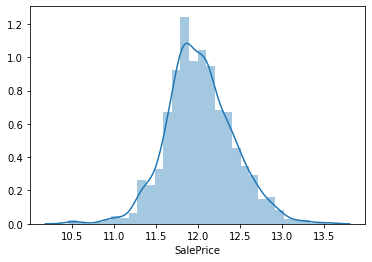

In [51]:
sns.distplot(output, hist=True, kde=True, bins=30)

## Missing values:

In [52]:
missing_value_data = house_data.isnull().sum().copy()

In [53]:
missing_value_data 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [54]:
#change series to dic
dic_missing = missing_value_data.to_dict()
print(dic_missing)

{'Id': 0, 'MSSubClass': 0, 'MSZoning': 0, 'LotFrontage': 259, 'LotArea': 0, 'Street': 0, 'Alley': 1369, 'LotShape': 0, 'LandContour': 0, 'Utilities': 0, 'LotConfig': 0, 'LandSlope': 0, 'Neighborhood': 0, 'Condition1': 0, 'Condition2': 0, 'BldgType': 0, 'HouseStyle': 0, 'OverallQual': 0, 'OverallCond': 0, 'YearBuilt': 0, 'YearRemodAdd': 0, 'RoofStyle': 0, 'RoofMatl': 0, 'Exterior1st': 0, 'Exterior2nd': 0, 'MasVnrType': 8, 'MasVnrArea': 8, 'ExterQual': 0, 'ExterCond': 0, 'Foundation': 0, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinSF1': 0, 'BsmtFinType2': 38, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'Heating': 0, 'HeatingQC': 0, 'CentralAir': 0, 'Electrical': 1, '1stFlrSF': 0, '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0, 'FullBath': 0, 'HalfBath': 0, 'BedroomAbvGr': 0, 'KitchenAbvGr': 0, 'KitchenQual': 0, 'TotRmsAbvGrd': 0, 'Functional': 0, 'Fireplaces': 0, 'FireplaceQu': 690, 'GarageType': 81, 'Gara

In [55]:
#colimns with missing values (each column has 1460 data) features with missing values
for k,v in dic_missing.items():
    if v!=0:
        print(k,v)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [56]:
 #data without missing values
for k,v in dic_missing.items():
    if v==0:
        print(k)

Id
MSSubClass
MSZoning
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageCars
GarageArea
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition


Some features have many missing values. We delete the features with high number of missing values: like "Alley" with 1369, 
"PoolQC" with 1453, "Fence" with 1179, "MiscFeature" with 1400, "Fireplace" with 690 and "LotFrontage" with 290 missing values.

In [57]:
new_house_data= house_data.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis=1)
new_house_test= house_test.drop(['Id','Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage'], axis=1)

## Building new features:

We can add new features using the current features that we have. Here, we build three new features. 

In [59]:
datas = [new_house_data, new_house_test]
for dataset in datas:
    dataset['TotalSF'] = dataset['1stFlrSF']+ dataset['2ndFlrSF'] + dataset['TotalBsmtSF']
    dataset['TotalPorch'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
    dataset['SaleType_new'] = dataset.apply(lambda i: 1 if i['SaleType']=='New' else 0, axis=1)  

In [60]:
new_house_data.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalPorch,SaleType_new
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,2,2008,WD,Normal,2566,61,0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,5,2007,WD,Normal,2524,0,0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,9,2008,WD,Normal,2706,42,0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,2,2006,WD,Abnorml,2473,307,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,12,2008,WD,Normal,3343,84,0


#### Determining categorical and numerical features:

In [61]:
cat_cols= [col for col in new_house_data.columns if new_house_data[col].nunique() <50  and
          new_house_data[col].dtype=='object']

In [62]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [63]:
len(cat_cols)

38

In [64]:
num_cols=[col for col in new_house_data.columns if new_house_data[col].dtype in ['int64', 'float64']]

In [65]:
num_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'TotalSF',
 'TotalPorch',
 'SaleType_new']

In [66]:
len(num_cols)

38

In [69]:
#concatinating new data with the output
all_data_output= pd.concat([new_house_data, output], axis=1)

In [70]:
all_data_output.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalPorch,SaleType_new,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,2,2008,WD,Normal,2566,61,0,12.247694
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,5,2007,WD,Normal,2524,0,0,12.109011
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,9,2008,WD,Normal,2706,42,0,12.317167
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,2,2006,WD,Abnorml,2473,307,0,11.849398
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,12,2008,WD,Normal,3343,84,0,12.429216


In [71]:
# separate numerical and the categorical data
num_data_output = all_data_output.drop(cat_cols, axis=1)
#num_data = all_data_output.drop(cat_cols, axis=1)


In [72]:
num_data_output.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalPorch,SaleType_new,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,2,2008,2566,61,0,12.247694
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,5,2007,2524,0,0,12.109011
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,9,2008,2706,42,0,12.317167
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,2,2006,2473,307,0,11.849398
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,12,2008,3343,84,0,12.429216


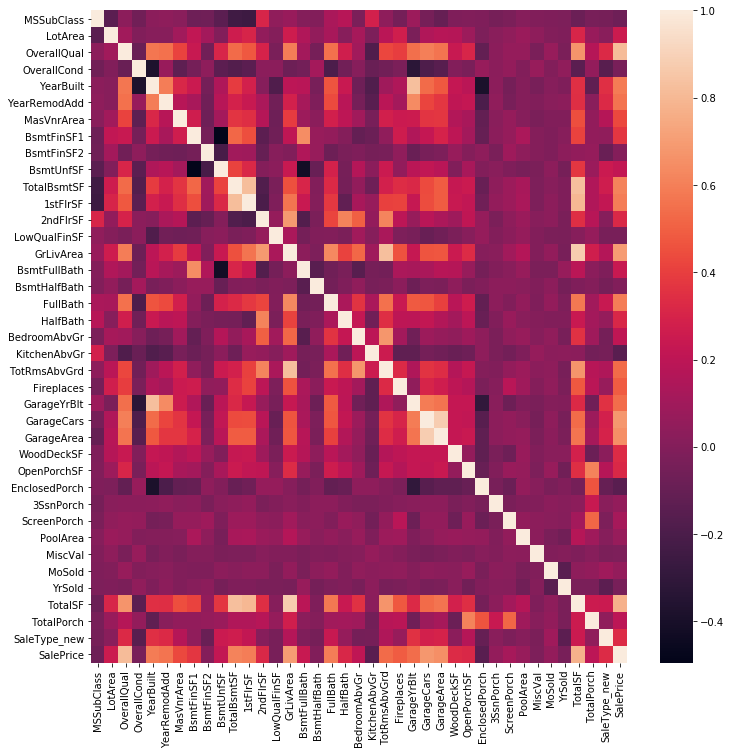

In [73]:
#heatmap for numerical features
plt.figure(figsize=(12,12))
sns.heatmap(num_data_output.corr(),vmax=1)

In [74]:
#determing the top and low corrolations between the numerical features and saleprice
cormat_num=num_data_output.corr()
high_cor_num_output=cormat_num['SalePrice'].sort_values(ascending=False)
low_cor_num_output=cormat_num['SalePrice'].sort_values(ascending=True)

In [75]:
high_cor_num_output.head(15)

SalePrice       1.000000
OverallQual     0.817184
TotalSF         0.777296
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489449
MasVnrArea      0.430809
Name: SalePrice, dtype: float64

In [76]:
low_cor_num_output.head(10)

EnclosedPorch   -0.149050
KitchenAbvGr    -0.147548
MSSubClass      -0.073959
LowQualFinSF    -0.037963
YrSold          -0.037263
OverallCond     -0.036868
MiscVal         -0.020021
BsmtHalfBath    -0.005149
BsmtFinSF2       0.004832
3SsnPorch        0.054900
Name: SalePrice, dtype: float64

"OverallQual": Overall material and finish quality" and "GrLivArea":Above grade (ground) living area square feet" 
are highly corrolated with the Saleprice. 

Let see deeply the feature "OverallQual": 

In [77]:
all_data_output['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

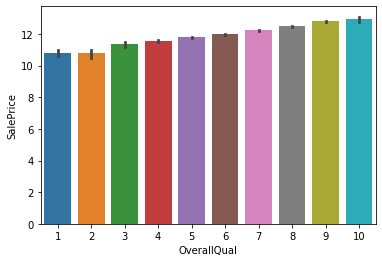

In [78]:
sns.barplot(x=all_data_output['OverallQual'], y=output)

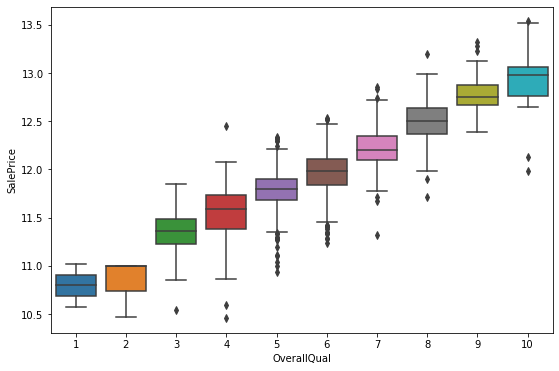

In [79]:
plt.figure(figsize=(9,6))
sns.boxplot(x=all_data['OverallQual'], y=output)

## Handling missing values:

### Handling missing values for numercial variables:

since the data is high dimensional it is better not to use the knn method. I first tried using KNNImputer but because of high dimensionality of data I decided to use another method for imputing.

In [80]:
from sklearn.impute import SimpleImputer
num_imputer= SimpleImputer(strategy='mean')

nums_data=new_house_data[num_cols]
nums_test = new_house_test[num_cols]

num_imputed_data= pd.DataFrame(num_imputer.fit_transform(nums_data), columns=num_cols)
num_imputed_test= pd.DataFrame(num_imputer.transform(nums_test), columns=num_cols)

In [81]:
num_imputed_data.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalPorch,SaleType_new
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,2566.0,61.0,0.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,2524.0,0.0,0.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,2706.0,42.0,0.0
3,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,2473.0,307.0,0.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,3343.0,84.0,0.0


In [82]:
num_imputed_test.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalPorch,SaleType_new
0,20.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,1778.0,120.0,0.0
1,20.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,2658.0,36.0,0.0
2,60.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,2557.0,34.0,0.0
3,60.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,2530.0,36.0,0.0
4,120.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,...,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,2560.0,226.0,0.0


### Handling missing values for categorical variables:

In [83]:
len(cat_cols)

38

In [84]:
new_house_data.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,TotalPorch,SaleType_new
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,2,2008,WD,Normal,2566,61,0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,5,2007,WD,Normal,2524,0,0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,9,2008,WD,Normal,2706,42,0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,2,2006,WD,Abnorml,2473,307,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,12,2008,WD,Normal,3343,84,0


In [85]:
#imputing missing values of categorical variables
cat_imputer= SimpleImputer(strategy='most_frequent')

In [86]:
cat_data=new_house_data[cat_cols]
cat_test = new_house_test[cat_cols]

In [87]:
cat_data.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [88]:
cat_test.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [89]:
cat_imputed_data= pd.DataFrame(cat_imputer.fit_transform(cat_data), columns=cat_cols)
cat_imputed_test= pd.DataFrame(cat_imputer.transform(cat_test), columns=cat_cols)

In [90]:
cat_imputed_data.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [91]:
cat_imputed_test.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [92]:
cat_imputed_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### Encoding categorical data: 

We use label encoding and count encoding for converting categorical data to numerical data.

 We decide to use label Encoding for following features: MSZoning, LotShape, Landcounter, Utilities, Lotconfig, Landslope, Condition1, Condition2,
HouseStyle, Roofstyle, roofMat1, Exterior1st, Exterior2nd, MasVnrType, 'ExterQual,ExterCond, BsmtQual, BsmtCond,
BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', HeatingQC, CentralAir, Electrical, KitchenQual, Functional,
FireplaceQu, rageFinish', 'GarageQual','GarageCond', PavedDrive', 'SaleType'.

We decide to use count encoding : 'Street', 'Neighborhood', 'BldgType', 'Foundation', 'Heating', 'GarageType', 'SaleCondition'.

#### Label Encoding: 

In [95]:
#label encoding of some categorical variables, we do it before train_test_split
from sklearn.preprocessing import LabelEncoder

cat_cols_label_enc= ['MSZoning', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
     'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType']
label_encoder = LabelEncoder()

cat_cols_enc_data= cat_imputed_data.copy()
cat_cols_enc_test= cat_imputed_test.copy()
for col in cat_cols_label_enc:
        cat_cols_enc_data[col]=label_encoder.fit_transform(cat_imputed_data[col])
        cat_cols_enc_test[col]=label_encoder.transform(cat_imputed_test[col])


In [96]:
cat_cols_enc_data.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,Pave,3,3,0,4,0,CollgCr,2,2,...,4,2,6,Attchd,1,4,4,2,8,Normal
1,3,Pave,3,3,0,2,0,Veenker,1,2,...,4,3,6,Attchd,1,4,4,2,8,Normal
2,3,Pave,0,3,0,4,0,CollgCr,2,2,...,4,2,6,Attchd,1,4,4,2,8,Normal
3,3,Pave,0,3,0,0,0,Crawfor,2,2,...,4,2,6,Detchd,2,4,4,2,8,Abnorml
4,3,Pave,0,3,0,2,0,NoRidge,2,2,...,4,2,6,Attchd,1,4,4,2,8,Normal


In [97]:
cat_cols_enc_test.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,Pave,3,3,0,4,0,NAmes,1,2,...,4,3,6,Attchd,2,4,4,2,8,Normal
1,3,Pave,0,3,0,0,0,NAmes,2,2,...,4,2,6,Attchd,2,4,4,2,8,Normal
2,3,Pave,0,3,0,4,0,Gilbert,2,2,...,4,3,6,Attchd,0,4,4,2,8,Normal
3,3,Pave,0,3,0,4,0,Gilbert,2,2,...,4,2,6,Attchd,0,4,4,2,8,Normal
4,3,Pave,0,1,0,4,0,StoneBr,2,2,...,4,2,6,Attchd,1,4,4,2,8,Normal


We call "data"  and "test" for the data sets and test sets which are imputed and encoded except the data which are supposed to be count encoded.

In [98]:
data=pd.concat([cat_cols_enc_data, num_imputed_data], axis=1)
test=pd.concat([cat_cols_enc_test, num_imputed_test], axis=1)

In [99]:
data.head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalPorch,SaleType_new
0,3,Pave,3,3,0,4,0,CollgCr,2,2,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,2566.0,61.0,0.0
1,3,Pave,3,3,0,2,0,Veenker,1,2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,2524.0,0.0,0.0
2,3,Pave,0,3,0,4,0,CollgCr,2,2,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,2706.0,42.0,0.0
3,3,Pave,0,3,0,0,0,Crawfor,2,2,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,2473.0,307.0,0.0
4,3,Pave,0,3,0,2,0,NoRidge,2,2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,3343.0,84.0,0.0
5,3,Pave,0,3,0,4,0,Mitchel,2,2,...,0.0,320.0,0.0,0.0,700.0,10.0,2009.0,2158.0,350.0,0.0
6,3,Pave,3,3,0,4,0,Somerst,2,2,...,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,3380.0,57.0,0.0
7,3,Pave,0,3,0,0,0,NWAmes,4,2,...,228.0,0.0,0.0,0.0,350.0,11.0,2009.0,3197.0,432.0,0.0
8,4,Pave,3,3,0,4,0,OldTown,0,2,...,205.0,0.0,0.0,0.0,0.0,4.0,2008.0,2726.0,205.0,0.0
9,3,Pave,3,3,0,0,0,BrkSide,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,2008.0,2068.0,4.0,0.0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   int64  
 1   Street         1460 non-null   object 
 2   LotShape       1460 non-null   int64  
 3   LandContour    1460 non-null   int64  
 4   Utilities      1460 non-null   int64  
 5   LotConfig      1460 non-null   int64  
 6   LandSlope      1460 non-null   int64  
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   int64  
 9   Condition2     1460 non-null   int64  
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   int64  
 12  RoofStyle      1460 non-null   int64  
 13  RoofMatl       1460 non-null   int64  
 14  Exterior1st    1460 non-null   int64  
 15  Exterior2nd    1460 non-null   int64  
 16  MasVnrType     1460 non-null   int64  
 17  ExterQual      1460 non-null   int64  
 18  ExterCon

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1459 non-null   int64  
 1   Street         1459 non-null   object 
 2   LotShape       1459 non-null   int64  
 3   LandContour    1459 non-null   int64  
 4   Utilities      1459 non-null   int64  
 5   LotConfig      1459 non-null   int64  
 6   LandSlope      1459 non-null   int64  
 7   Neighborhood   1459 non-null   object 
 8   Condition1     1459 non-null   int64  
 9   Condition2     1459 non-null   int64  
 10  BldgType       1459 non-null   object 
 11  HouseStyle     1459 non-null   int64  
 12  RoofStyle      1459 non-null   int64  
 13  RoofMatl       1459 non-null   int64  
 14  Exterior1st    1459 non-null   int64  
 15  Exterior2nd    1459 non-null   int64  
 16  MasVnrType     1459 non-null   int64  
 17  ExterQual      1459 non-null   int64  
 18  ExterCon

We split "data" to train and validation sets.

In [102]:
from sklearn.model_selection import train_test_split
train, valid, y, y_valid = train_test_split(data, output, test_size=0.2, random_state=0)

In [103]:
train.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalPorch,SaleType_new
618,3,Pave,3,3,0,4,0,NridgHt,2,2,...,0.0,0.0,260.0,0.0,0.0,7.0,2007.0,3650.0,368.0,1.0
870,3,Pave,3,3,0,4,0,NAmes,4,2,...,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,1788.0,0.0,0.0
92,3,Pave,0,1,0,4,0,Crawfor,2,2,...,44.0,0.0,0.0,0.0,0.0,8.0,2009.0,1840.0,44.0,0.0
817,3,Pave,0,3,0,1,0,Mitchel,2,2,...,0.0,0.0,0.0,0.0,0.0,7.0,2008.0,3257.0,59.0,0.0
302,3,Pave,0,3,0,0,0,CollgCr,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,3082.0,81.0,0.0


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 618 to 684
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1168 non-null   int64  
 1   Street         1168 non-null   object 
 2   LotShape       1168 non-null   int64  
 3   LandContour    1168 non-null   int64  
 4   Utilities      1168 non-null   int64  
 5   LotConfig      1168 non-null   int64  
 6   LandSlope      1168 non-null   int64  
 7   Neighborhood   1168 non-null   object 
 8   Condition1     1168 non-null   int64  
 9   Condition2     1168 non-null   int64  
 10  BldgType       1168 non-null   object 
 11  HouseStyle     1168 non-null   int64  
 12  RoofStyle      1168 non-null   int64  
 13  RoofMatl       1168 non-null   int64  
 14  Exterior1st    1168 non-null   int64  
 15  Exterior2nd    1168 non-null   int64  
 16  MasVnrType     1168 non-null   int64  
 17  ExterQual      1168 non-null   int64  
 18  ExterCo

In [105]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 529 to 61
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       292 non-null    int64  
 1   Street         292 non-null    object 
 2   LotShape       292 non-null    int64  
 3   LandContour    292 non-null    int64  
 4   Utilities      292 non-null    int64  
 5   LotConfig      292 non-null    int64  
 6   LandSlope      292 non-null    int64  
 7   Neighborhood   292 non-null    object 
 8   Condition1     292 non-null    int64  
 9   Condition2     292 non-null    int64  
 10  BldgType       292 non-null    object 
 11  HouseStyle     292 non-null    int64  
 12  RoofStyle      292 non-null    int64  
 13  RoofMatl       292 non-null    int64  
 14  Exterior1st    292 non-null    int64  
 15  Exterior2nd    292 non-null    int64  
 16  MasVnrType     292 non-null    int64  
 17  ExterQual      292 non-null    int64  
 18  ExterCond

#### Count encoding: 


Now we use count encoding to encode the rest of categorical data to numerical data. We note that we can use count encoding after spliting data otherwise we have leakage.

In [106]:
count_cols=['Street', 'Neighborhood', 'BldgType', 'Foundation', 'Heating', 'GarageType', 'SaleCondition']

In [107]:
train['Street']

618     Pave
870     Pave
92      Pave
817     Pave
302     Pave
        ... 
763     Pave
835     Pave
1216    Pave
559     Pave
684     Pave
Name: Street, Length: 1168, dtype: object

In [109]:
import category_encoders as ce
count_enc=ce.CountEncoder()

In [110]:
counted_train= count_enc.fit_transform(train[count_cols])
counted_valid= count_enc.transform(valid[count_cols])
counted_test= count_enc.transform(test[count_cols])

In [111]:
counted_train.head(5)

,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
618,1163,61,981,512,1143,754,98
870,1163,177,981,505,1143,315,969
92,1163,40,981,125,1143,315,969
817,1163,42,981,512,1143,754,969
302,1163,116,981,512,1143,754,969


In [112]:
counted_valid.head(5)

,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
529,1163,40,981,512,1143,754,7
491,1163,177,981,505,1143,754,969
459,1163,46,981,505,1143,315,969
279,1163,26,981,505,1143,754,969
655,1163,12,35,505,1143,315,12


In [113]:
counted_test.head(5)

,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
0,1163,177,981,505,1143,754,969
1,1163,177,981,505,1143,754,969
2,1163,64,981,512,1143,754,969
3,1163,64,981,512,1143,754,969
4,1163,17,89,512,1143,754,969


We remove the columns which are supposed to be count encoded and then we count encoded data to our data.

In [114]:
#remove count_cols from the original train, valid and test sets.
train = train.drop(count_cols, axis=1)
valid=valid.drop(count_cols, axis=1)
test=test.drop(count_cols, axis=1)

In [115]:
train.head(5)

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,HouseStyle,RoofStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,TotalPorch,SaleType_new
618,3,3,3,0,4,0,2,2,2,3,...,0.0,0.0,260.0,0.0,0.0,7.0,2007.0,3650.0,368.0,1.0
870,3,3,3,0,4,0,4,2,2,3,...,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,1788.0,0.0,0.0
92,3,0,1,0,4,0,2,2,2,1,...,44.0,0.0,0.0,0.0,0.0,8.0,2009.0,1840.0,44.0,0.0
817,3,0,3,0,1,0,2,2,2,3,...,0.0,0.0,0.0,0.0,0.0,7.0,2008.0,3257.0,59.0,0.0
302,3,0,3,0,0,0,2,2,2,1,...,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,3082.0,81.0,0.0


In [116]:
#we add new columns which are encoded by count encoding
X_train=pd.concat([train, counted_train], axis=1)
X_valid=pd.concat([valid, counted_valid], axis=1)
X_test=pd.concat([test, counted_test], axis=1)

In [117]:
X_train.head(5)

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,HouseStyle,RoofStyle,...,TotalSF,TotalPorch,SaleType_new,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
618,3,3,3,0,4,0,2,2,2,3,...,3650.0,368.0,1.0,1163,61,981,512,1143,754,98
870,3,3,3,0,4,0,4,2,2,3,...,1788.0,0.0,0.0,1163,177,981,505,1143,315,969
92,3,0,1,0,4,0,2,2,2,1,...,1840.0,44.0,0.0,1163,40,981,125,1143,315,969
817,3,0,3,0,1,0,2,2,2,3,...,3257.0,59.0,0.0,1163,42,981,512,1143,754,969
302,3,0,3,0,0,0,2,2,2,1,...,3082.0,81.0,0.0,1163,116,981,512,1143,754,969


In [118]:
X_valid.head(5)

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,HouseStyle,RoofStyle,...,TotalSF,TotalPorch,SaleType_new,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
529,3,0,3,0,1,0,2,2,2,3,...,4550.0,200.0,0.0,1163,40,981,512,1143,754,7
491,3,3,3,0,4,0,0,2,0,1,...,2384.0,32.0,0.0,1163,177,981,505,1143,754,969
459,3,0,0,0,0,0,2,2,0,1,...,1912.0,248.0,0.0,1163,46,981,505,1143,315,969
279,3,3,3,0,4,0,2,2,5,3,...,3182.0,117.0,0.0,1163,26,981,505,1143,754,969
655,4,3,3,0,4,0,2,2,5,1,...,1617.0,0.0,0.0,1163,12,35,505,1143,315,12


In [119]:
X_test.head(5)

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,HouseStyle,RoofStyle,...,TotalSF,TotalPorch,SaleType_new,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
0,2,3,3,0,4,0,1,2,2,1,...,1778.0,120.0,0.0,1163,177,981,505,1143,754,969
1,3,0,3,0,0,0,2,2,2,3,...,2658.0,36.0,0.0,1163,177,981,505,1143,754,969
2,3,0,3,0,4,0,2,2,5,1,...,2557.0,34.0,0.0,1163,64,981,512,1143,754,969
3,3,0,3,0,4,0,2,2,5,1,...,2530.0,36.0,0.0,1163,64,981,512,1143,754,969
4,3,0,1,0,4,0,2,2,2,1,...,2560.0,226.0,0.0,1163,17,89,512,1143,754,969


Until now we filled missing values, encoded the categorical values

## Building model:

Now we build different models:

In [120]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [121]:
from sklearn.tree import DecisionTreeRegressor
model_2 = DecisionTreeRegressor()

In [122]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(n_estimators=50,random_state=0)

In [123]:
from sklearn.svm import SVR
model_4 = SVR(gamma='auto')

In [124]:
from sklearn.linear_model import SGDRegressor
model_5= SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.01)

We use square root metrics to choose the best model.

In [125]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def get_score(model, X_t, y_t, X_v, y_v):
    model.fit(X_t, y_t)
    pred = model.predict(X_v)
    mse = mean_squared_error(y_v, pred)
    rmse = sqrt(mse)
    return rmse
    
    

In [126]:
print('Linear_regression_model: ', get_score(model_1, X_train, y, X_valid, y_valid))

Linear_regression_model:  0.22031109075910948


In [127]:
print('Decision_tree_model: ', get_score(model_2, X_train, y, X_valid, y_valid))

Decision_tree_model:  0.19586564009106353


In [128]:
print('Random_forest_model: ', get_score(model_3, X_train, y, X_valid, y_valid))

Random_forest_model:  0.14144274777344748


In [129]:
print('Support_vector_machine: ', get_score(model_4, X_train, y, X_valid, y_valid))

Support_vector_machine:  0.3890530357633303


In [130]:
print('SGDC_model: ', get_score(model_5, X_train, y, X_valid, y_valid))

SGDC_model:  5.712116949026757e+16


We choose the random_forest model among this models which has less error. 

### Improving parameters of the random forest:

In [131]:
def get_estimator(n):
    rf = RandomForestRegressor(n_estimators=n, random_state=0)
    return get_score(rf, X_train, y, X_valid, y_valid)

In [132]:
get_estimator(100)

0.13994442132380494

In [133]:
estim= list(np.arange(50,1500,20))
best_estimator=[]
for i in estim:
    best_estimator.append(get_estimator(i))
    
    


In [134]:
best_estimator

[0.14144274777344748,
 0.14075155617885057,
 0.13923685439141684,
 0.13991964903166787,
 0.13930765157653577,
 0.14026921249845042,
 0.14027183291776182,
 0.14009440302893064,
 0.14038447677766988,
 0.14021649224279562,
 0.14023914969660808,
 0.13970240945187842,
 0.13960350410598335,
 0.1394569015299845,
 0.13959892450270267,
 0.13947096117210883,
 0.1393739901785043,
 0.1394077869920718,
 0.13931159450769182,
 0.13925154658548552,
 0.13945944275343158,
 0.13939833068506485,
 0.13945670714711242,
 0.13939480294380208,
 0.13925372544775513,
 0.13940409135623702,
 0.13945824327799375,
 0.13954503839571955,
 0.13936468036067204,
 0.13936887025062256,
 0.1395299051625152,
 0.1393637018934875,
 0.1391677951326466,
 0.13920143893075695,
 0.13894103170537664,
 0.1388544634391305,
 0.13880492801718733,
 0.13881478699493985,
 0.1387314297468413,
 0.13872974682655959,
 0.1387662115934584,
 0.13873046159548233,
 0.13874028632497215,
 0.13879966586440176,
 0.1387706329160292,
 0.1387521506630745,

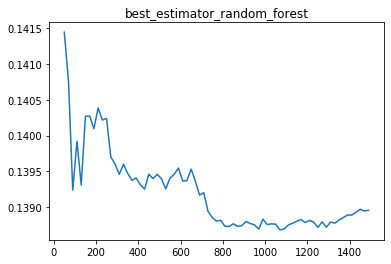

In [135]:
plt.plot(estim, best_estimator)
plt.title('best_estimator_random_forest')
plt.show()

In [138]:
get_estimator(1450)

0.13897006714962262

with this method, the best n_estimator of random_forest can be 1100.

Aonther method to find the best parameters for our model is "grid_search". We can compare the errors of these two methods.

In [139]:
#we can compare the method that we can use the best parameter for choose esstimator for random_forest
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators': range(50,1500, 50)}
grid=GridSearchCV(RandomForestRegressor(), param_grid, verbose=3 )
grid.fit(X_train, y)
grid.best_params_

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=50, score=0.907, total=   0.7s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.813, total=   0.7s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.862, total=   0.7s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.890, total=   0.8s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.887, total=   0.8s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.908, total=   1.5s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.821, total=   1.5s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.869, total=   1.4s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.894, total=   1.4s
[CV] n_estimators=100 ................................................
[CV] .

[CV] .................... n_estimators=650, score=0.909, total=   9.5s
[CV] n_estimators=650 ................................................
[CV] .................... n_estimators=650, score=0.825, total=   9.4s
[CV] n_estimators=650 ................................................
[CV] .................... n_estimators=650, score=0.868, total=   9.8s
[CV] n_estimators=650 ................................................
[CV] .................... n_estimators=650, score=0.892, total=  10.0s
[CV] n_estimators=650 ................................................
[CV] .................... n_estimators=650, score=0.894, total=   9.6s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.910, total=  10.2s
[CV] n_estimators=700 ................................................
[CV] .................... n_estimators=700, score=0.821, total=  10.4s
[CV] n_estimators=700 ................................................
[CV] .

[CV] ................... n_estimators=1200, score=0.892, total=  18.2s
[CV] n_estimators=1200 ...............................................
[CV] ................... n_estimators=1200, score=0.893, total=  18.3s
[CV] n_estimators=1250 ...............................................
[CV] ................... n_estimators=1250, score=0.910, total=  19.0s
[CV] n_estimators=1250 ...............................................
[CV] ................... n_estimators=1250, score=0.823, total=  18.8s
[CV] n_estimators=1250 ...............................................
[CV] ................... n_estimators=1250, score=0.868, total=  19.8s
[CV] n_estimators=1250 ...............................................
[CV] ................... n_estimators=1250, score=0.894, total=  23.7s
[CV] n_estimators=1250 ...............................................
[CV] ................... n_estimators=1250, score=0.894, total=  20.7s
[CV] n_estimators=1300 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed: 27.5min finished


{'n_estimators': 800}

With this methode, the best n_estimator is 800!

I keep n_estimators=1100.

In [140]:
rf_model= RandomForestRegressor(n_estimators = 1100, random_state=0)

### Selecting features:

We reduce the dimension of our data by removing some features. We can use pearsons corrolation for numerical data and Anova for categorical data.

In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [142]:
X_train.head(5)

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,HouseStyle,RoofStyle,...,TotalSF,TotalPorch,SaleType_new,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
618,3,3,3,0,4,0,2,2,2,3,...,3650.0,368.0,1.0,1163,61,981,512,1143,754,98
870,3,3,3,0,4,0,4,2,2,3,...,1788.0,0.0,0.0,1163,177,981,505,1143,315,969
92,3,0,1,0,4,0,2,2,2,1,...,1840.0,44.0,0.0,1163,40,981,125,1143,315,969
817,3,0,3,0,1,0,2,2,2,3,...,3257.0,59.0,0.0,1163,42,981,512,1143,754,969
302,3,0,3,0,0,0,2,2,2,1,...,3082.0,81.0,0.0,1163,116,981,512,1143,754,969


In [143]:
X_train_features=X_train.columns

In [144]:
X_train_features

Index(['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 

In [146]:
selector_num = SelectKBest(score_func=f_regression, k=15)
# apply feature selection
X_train_selected = selector_num.fit_transform(X_train, y)

In [147]:
X_train_selected

array([[0.000e+00, 0.000e+00, 2.000e+00, ..., 3.000e+00, 7.740e+02,
        3.650e+03],
       [3.000e+00, 3.000e+00, 3.000e+00, ..., 1.000e+00, 3.080e+02,
        1.788e+03],
       [3.000e+00, 2.000e+00, 3.000e+00, ..., 2.000e+00, 4.320e+02,
        1.840e+03],
       ...,
       [3.000e+00, 3.000e+00, 3.000e+00, ..., 2.000e+00, 5.390e+02,
        1.902e+03],
       [2.000e+00, 2.000e+00, 2.000e+00, ..., 2.000e+00, 4.200e+02,
        2.931e+03],
       [2.000e+00, 2.000e+00, 3.000e+00, ..., 2.000e+00, 4.860e+02,
        3.034e+03]])

In [148]:
# Get back the features we took, zero out all other features
slected_features = pd.DataFrame(selector_num.inverse_transform(X_train_selected),
                                          index = X_train.index, 
                                          columns = X_train_features)

In [149]:
slected_features.head(5)

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,HouseStyle,RoofStyle,...,TotalSF,TotalPorch,SaleType_new,Street,Neighborhood,BldgType,Foundation,Heating,GarageType,SaleCondition
618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1788.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1840.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3082.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
slected_col_X_train = slected_features.columns[slected_features.var()!=0]


In [151]:
slected_col_X_train

Index(['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalSF'],
      dtype='object')

In [152]:
new_X_train = X_train[slected_col_X_train]

In [153]:
new_X_train.head(5)

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalSF
618,0,0,2,2,9.0,2007.0,2007.0,1822.0,1828.0,1828.0,2.0,9.0,3.0,774.0,3650.0
870,3,3,3,2,5.0,1962.0,1962.0,894.0,894.0,894.0,1.0,5.0,1.0,308.0,1788.0
92,3,2,3,2,5.0,1921.0,2006.0,876.0,964.0,964.0,1.0,5.0,2.0,432.0,1840.0
817,2,2,2,1,8.0,2002.0,2002.0,1568.0,1689.0,1689.0,2.0,7.0,3.0,857.0,3257.0
302,2,2,2,1,7.0,2001.0,2002.0,1541.0,1541.0,1541.0,2.0,6.0,3.0,843.0,3082.0


In [154]:
print(new_X_train.shape)
print(y.shape)

(1168, 15)
(1168,)


In [155]:
new_X_valid = X_valid[slected_col_X_train]
new_X_test = X_test[slected_col_X_train]

In [156]:
print(new_X_valid.shape)
print(y_valid.shape)

(292, 15)
(292,)


In [157]:
print(new_X_test.shape)

(1459, 15)


In [158]:
new_X_valid.head(5)

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalSF
529,2,3,3,1,6.0,1957.0,1975.0,2035.0,2515.0,2515.0,3.0,9.0,2.0,484.0,4550.0
491,3,3,1,2,6.0,1941.0,1950.0,806.0,958.0,1578.0,1.0,5.0,1.0,240.0,2384.0
459,3,3,2,2,5.0,1950.0,1950.0,709.0,979.0,1203.0,1.0,5.0,1.0,352.0,1912.0
279,3,2,3,0,7.0,1977.0,1977.0,1160.0,1156.0,2022.0,2.0,8.0,2.0,505.0,3182.0
655,3,3,3,2,6.0,1971.0,1971.0,525.0,525.0,1092.0,1.0,6.0,1.0,264.0,1617.0


In [159]:
new_X_test.head(5)

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalSF
0,3,3,3,2,5.0,1961.0,1961.0,882.0,896.0,896.0,1.0,5.0,1.0,730.0,1778.0
1,3,3,2,2,6.0,1958.0,1958.0,1329.0,1329.0,1329.0,1.0,6.0,1.0,312.0,2658.0
2,3,2,3,0,5.0,1997.0,1998.0,928.0,928.0,1629.0,2.0,6.0,2.0,482.0,2557.0
3,3,3,2,0,6.0,1998.0,1998.0,926.0,926.0,1604.0,2.0,7.0,2.0,470.0,2530.0
4,2,2,2,1,8.0,1992.0,1992.0,1280.0,1280.0,1280.0,2.0,5.0,2.0,506.0,2560.0


In [160]:
#apply our model
rf_model.fit(new_X_train,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [161]:
preds = rf_model.predict(new_X_valid)
mse1 = mean_squared_error(y_valid, preds)
rmse1 = sqrt(mse1)

In [162]:
rmse1

0.14859859957836308

In [163]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, preds)

0.10295050278084503

We can reduce the root mean squared error by building more relevant features.

## Predicting for the test set:
    

In [164]:
#Look at our the final test set
new_X_test.head(5)

,ExterQual,BsmtQual,KitchenQual,GarageFinish,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,TotalSF
0,3,3,3,2,5.0,1961.0,1961.0,882.0,896.0,896.0,1.0,5.0,1.0,730.0,1778.0
1,3,3,2,2,6.0,1958.0,1958.0,1329.0,1329.0,1329.0,1.0,6.0,1.0,312.0,2658.0
2,3,2,3,0,5.0,1997.0,1998.0,928.0,928.0,1629.0,2.0,6.0,2.0,482.0,2557.0
3,3,3,2,0,6.0,1998.0,1998.0,926.0,926.0,1604.0,2.0,7.0,2.0,470.0,2530.0
4,2,2,2,1,8.0,1992.0,1992.0,1280.0,1280.0,1280.0,2.0,5.0,2.0,506.0,2560.0


In [165]:
print(new_X_test.shape)

(1459, 15)


In [168]:
#add column "Id" to our test data
test_id = house_test['Id']

In [169]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [171]:
log_predict_test = rf_model.predict(new_X_test)
actual_predict_test = np.exp(log_predict_test)

In [175]:
log_predict_test

array([11.66143978, 11.85902708, 12.07884309, ..., 11.88645079,
       11.54719061, 12.33344317])

In [173]:
actual_predict_test

array([116010.93996759, 141354.62405111, 176106.30440605, ...,
       145284.73573039, 103485.89575736, 227167.55869151])